<a href="https://colab.research.google.com/github/Aparnab2243/Monitoring-states-for-effective-management/blob/main/Copy_of_rock_v_s_mine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load the datase
df = pd.read_csv('/content/sonar data.csv')

In [ ]:

df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (208, 61)


In [ ]:
print(data.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

 2 **Data** Preparation

In [ ]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3 Model Development**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

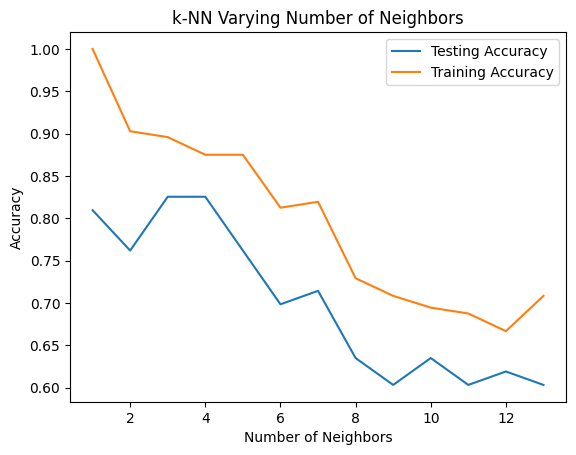

In [ ]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN Varying Number of Neighbors')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_logistic = model.predict(X_test)

In [ ]:
# Initialize PCA and reduce the number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression model on PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
# Train SVM model on original features
svm = SVC(kernel='linear')  # You can use different kernels like 'rbf' as well
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

**4 Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))

kNN Accuracy: 0.7619047619047619


In [ ]:
print("kNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

kNN Confusion Matrix:
[[31  5]
 [10 17]]


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.746031746031746


In [ ]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Confusion Matrix:
[[24 12]
 [ 4 23]]


In [ ]:
# Evaluate the PCA-based model
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca))
print("PCA + Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))

PCA + Logistic Regression Accuracy: 0.7619047619047619
PCA + Logistic Regression Confusion Matrix:
[[24 12]
 [ 3 24]]


In [ ]:
# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.7619047619047619
SVM Confusion Matrix:
[[26 10]
 [ 5 22]]


In [ ]:
input_data = (0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117)

#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


[1]
The object is a mine


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
